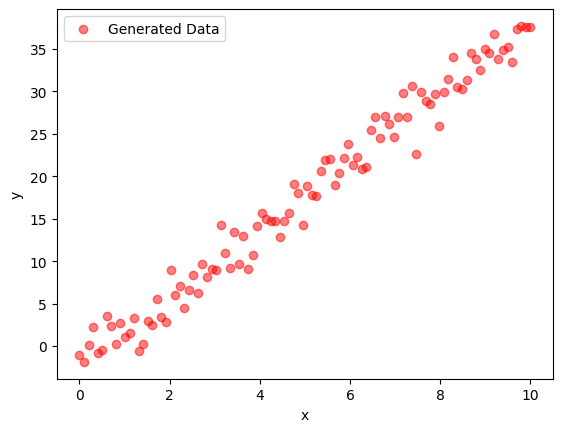

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

np.random.seed(42)


X = np.linspace(0, 10, 100)  

# Generate noise
noise = np.random.normal(0, 2, size=X.shape) 


y = 4 * X - 2 + noise

# Plot the data
plt.scatter(X, y, label="Generated Data", color="red", alpha=0.5)
plt.xlabel("x")
plt.ylabel("y")
plt.legend() 
plt.show()


In [2]:
X.shape 

(100,)

In [3]:
X = X.reshape(-1,1)

In [4]:
y = y.reshape(-1,1)

In [5]:
X.shape 

(100, 1)

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
len(X)

100

In [8]:
def accuracy(X , y , W):
    X = np.hstack((X,np.ones((X.shape[0], 1))))
    predictions = X.dot(W)
    mse = mean_squared_error(y, predictions)
    return predictions , mse
    

In [9]:
def BGD(X, y, num_iterations = 1000 ):
    X = np.hstack((X,np.ones((X.shape[0], 1))))
    alpha = 0.001
    W = np.random.randn(X.shape[1], 1)
    for i in range(num_iterations) :    
        yhat = X.dot(W)
        error = yhat - y
        gradient = X.T.dot(error) / len(X)
        W = W - alpha * gradient 
    return W             

In [10]:
W = BGD(X_train, y_train )

In [11]:
BGD_predictions , loss = accuracy(X_test, y_test,W)
print(loss)

3.7077121656339997


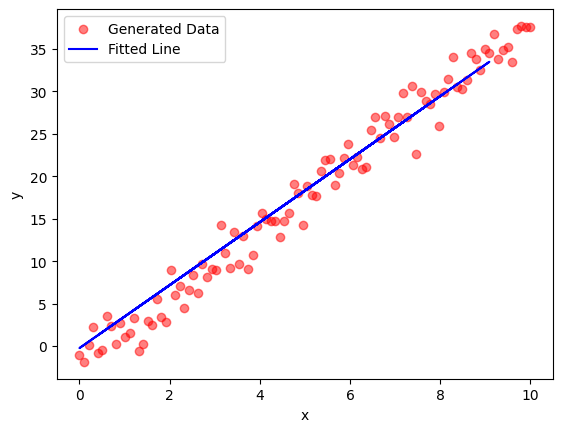

In [12]:
plt.scatter(X, y, label="Generated Data", color="red", alpha=0.5)
plt.plot(X_test, BGD_predictions, label="Fitted Line", color="blue")
plt.xlabel("x")
plt.ylabel("y")
plt.legend() 
plt.show()

In [13]:
def SGD(X, y, num_iterations = 1000 ):
    alpha = 0.001
    X = np.hstack((X,np.ones((X.shape[0], 1))))
    W = np.random.randn(X.shape[1], 1)
    for i in range(num_iterations) :   
        for j in range(len(X)): 
            yhat = X[j].dot(W)
            error = yhat - y[j]
            gradient = X[j].reshape(-1,1) * error 
            W = W - alpha * gradient 
    return W             

In [14]:
SGD_predictions , loss = accuracy(X_test, y_test,SGD(X_train, y_train))
print(loss)

2.4707585875172517


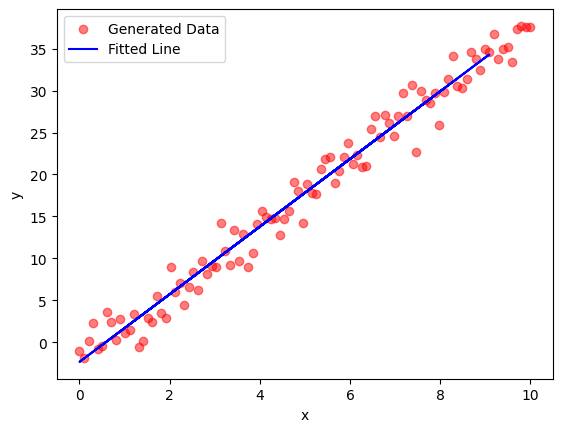

In [15]:
plt.scatter(X, y, label="Generated Data", color="red", alpha=0.5)
plt.plot(X_test, SGD_predictions, label="Fitted Line", color="blue")
plt.xlabel("x")
plt.ylabel("y")
plt.legend() 
plt.show()

In [16]:
def MBGD(X, y, num_iterations=1000, batch_size=32, alpha=0.001):
    X = np.hstack((X,np.ones((X.shape[0], 1))))
    W = np.random.randn(X.shape[1], 1)
    for i in range(num_iterations):
            
            for j in range(0, len(X), batch_size):  
                X_batch = X[j:j + batch_size]  
                y_batch = y[j:j + batch_size] 
                
                yhat = X_batch.dot(W)  
                error = yhat - y_batch  
            
                gradient = X_batch.T.dot(error) / batch_size  
                
                
                W = W - alpha * gradient  

    return W 

In [17]:
MBGD_predictions , loss = accuracy(X_test, y_test,MBGD(X_train, y_train))
print(loss)

3.3812700647770377


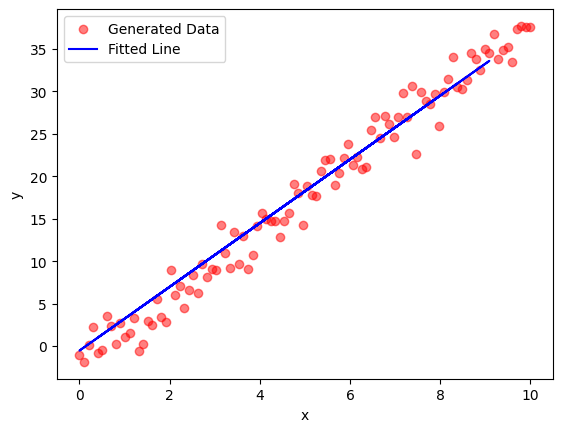

In [18]:
plt.scatter(X, y, label="Generated Data", color="red", alpha=0.5)
plt.plot(X_test, MBGD_predictions, label="Fitted Line", color="blue")
plt.xlabel("x")
plt.ylabel("y")
plt.legend() 
plt.show()

In [19]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
sklearn_predictions = model.predict(X_test)
mse = mean_squared_error(y_test, sklearn_predictions)
print(mse)

2.488168969160711


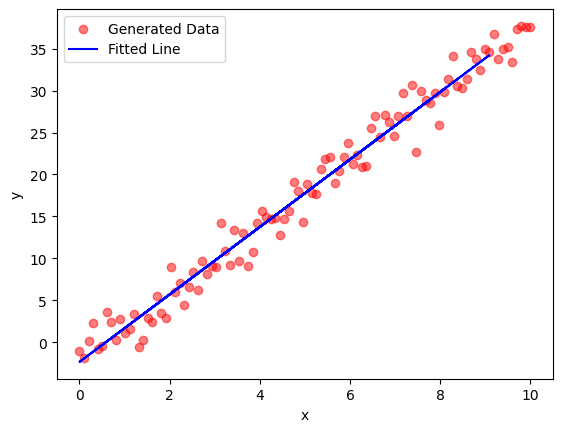

In [20]:
plt.scatter(X, y, label="Generated Data", color="red", alpha=0.5)
plt.plot(X_test, sklearn_predictions, label="Fitted Line", color="blue")
plt.xlabel("x")
plt.ylabel("y")
plt.legend() 
plt.show()

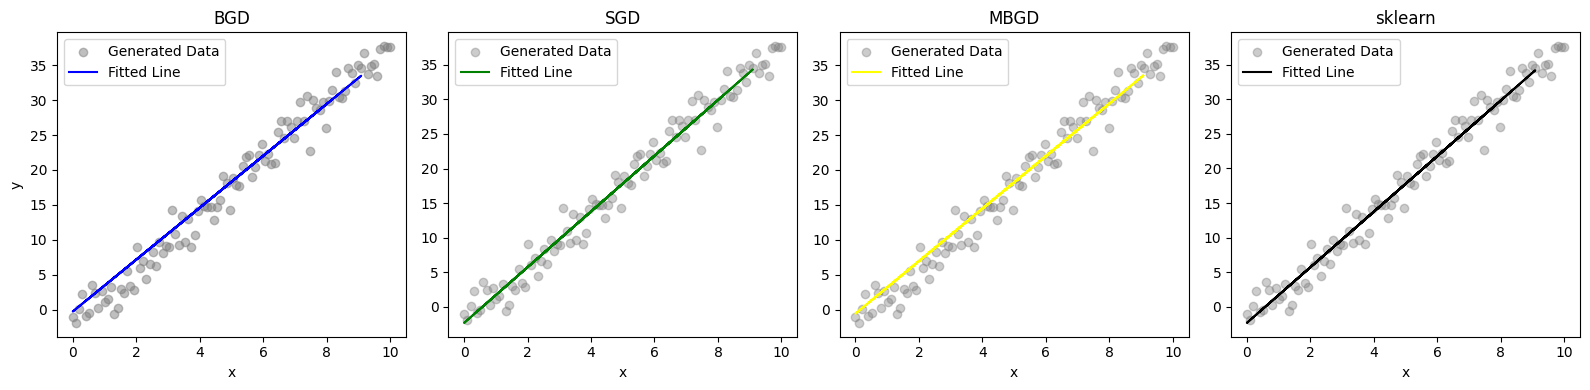

In [21]:
fig, axes = plt.subplots(1, 4, figsize=(16, 4))  
# First Plot
axes[0].scatter(X, y, label="Generated Data", color="gray", alpha=0.5)
axes[0].plot(X_test, BGD_predictions, label="Fitted Line", color="blue")
axes[0].set_xlabel("x")
axes[0].set_ylabel("y")
axes[0].legend()
axes[0].set_title("BGD")

# Second Plot
axes[1].scatter(X, y, label="Generated Data", color="gray", alpha=0.4)
axes[1].plot(X_test, SGD_predictions, label="Fitted Line", color="green")
axes[1].set_xlabel("x")
axes[1].legend()
axes[1].set_title("SGD")

# Third Plot
axes[2].scatter(X, y, label="Generated Data", color="gray", alpha=0.4)
axes[2].plot(X_test, MBGD_predictions, label="Fitted Line", color="yellow")
axes[2].set_xlabel("x")
axes[2].legend()
axes[2].set_title("MBGD")

# Fourth Plot
axes[3].scatter(X, y, label="Generated Data", color="gray", alpha=0.4)
axes[3].plot(X_test, sklearn_predictions, label="Fitted Line", color="black")
axes[3].set_xlabel("x")
axes[3].legend()
axes[3].set_title("sklearn")

# Adjust layout
plt.tight_layout()
plt.show()